# Librerías

In [ ]:
import numpy as np
import pandas as pd
import tensorflow

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Se importan datos desde GitHub

In [ ]:
data_url = 'https://raw.githubusercontent.com/Crodaycat/proyecto_final_simulaci-n/master/data/heart.csv'

imported_data = pd.read_csv(data_url)

# Preprocesamiento de los datos

## Separación de caracteristicas(x) y clases (y)



In [ ]:
numeric_columns = ['Age', 'RestingBP', 'Cholesterol','FastingBS', 'MaxHR', 'Oldpeak']
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


x_columns = numeric_columns + categorical_columns

y_column = 'HeartDisease'

y_df = imported_data[y_column]

y_df

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

## Encodificación y normalización de los datos

In [ ]:
mm = MinMaxScaler()
x_df = pd.get_dummies(imported_data, columns = categorical_columns, drop_first = True).drop(columns = y_column)
x_df = pd.DataFrame(mm.fit_transform(x_df), columns = x_df.columns)
x_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.55,0.437811,0.0,0.507042,0.431818,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
914,0.816327,0.72,0.320066,1.0,0.570423,0.681818,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.591837,0.65,0.217247,0.0,0.387324,0.431818,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
916,0.591837,0.65,0.391376,0.0,0.802817,0.295455,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Análisis discriminante Cuadrático

## Separación de datos en conjuntos de prueba y entrenamiento



In [ ]:
def filterCapValue(list, value):
  cols = []
  for k in list.keys():
    if (list[k] < value):
      cols.append(k)
  return cols

In [ ]:
x_train, x_test, y_train , y_test = train_test_split(x_df, y_df, test_size = 0.3)

x_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
656,0.693878,0.62,0.346600,0.0,0.725352,0.295455,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
427,0.632653,0.70,0.000000,0.0,0.401408,0.409091,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
782,0.510204,0.65,0.326700,1.0,0.647887,0.431818,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
889,0.632653,0.67,0.338308,0.0,0.718310,0.386364,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
888,0.489796,0.64,0.338308,1.0,0.676056,0.409091,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0.510204,0.60,0.407960,0.0,0.394366,0.295455,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
222,0.408163,0.60,0.323383,0.0,0.457746,0.295455,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
848,0.489796,0.64,0.422886,0.0,0.711268,0.295455,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
819,0.551020,0.80,0.479270,0.0,0.598592,0.386364,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
f_scores = chi2(X = x_df, y = y_df)

p_values = pd.Series(f_scores[1], index = x_df.columns)
p_values.sort_values(ascending = True, inplace = True)

# Descartando columnas con valores superiores a 0.2
x_train = x_train.filter(items=filterCapValue(p_values, 0.05))
x_test = x_test.filter(items=filterCapValue(p_values, 0.05))
x_df = x_df.filter(items=filterCapValue(p_values, 0.05))

p_values

ST_Slope_Up          6.106858e-46
ST_Slope_Flat        1.933233e-32
ExerciseAngina_Y     6.549289e-31
ChestPainType_ATA    5.304212e-28
FastingBS            1.321526e-12
ChestPainType_NAP    1.237068e-08
Sex_M                2.201817e-05
MaxHR                3.115906e-03
RestingECG_ST        5.286421e-03
Oldpeak              1.851687e-02
Age                  2.269201e-02
Cholesterol          2.597310e-02
RestingECG_Normal    7.976903e-02
ChestPainType_TA     1.056762e-01
RestingBP            7.108734e-01
dtype: float64

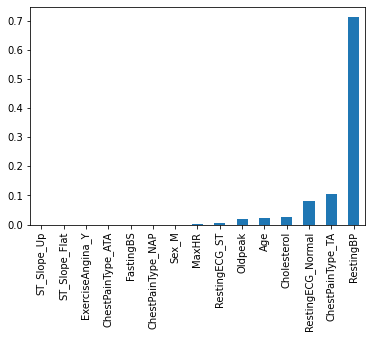

In [ ]:
p_values.plot.bar()

## Implementación del modelo

In [ ]:
qda = QuadraticDiscriminantAnalysis()

qda.fit(X = x_train, y = y_train)

y_predict = qda.predict(X = x_test)

print('Accuracy = '+str(accuracy_score(y_test, y_predict)))
print('Precision = '+str(precision_score(y_test, y_predict)))
print('Recall = '+str(recall_score(y_test, y_predict)))
print('F_1 = '+str(f1_score(y_test, y_predict)))

Accuracy = 0.8369565217391305
Precision = 0.8481012658227848
Recall = 0.864516129032258
F_1 = 0.8562300319488818


# Ventana de Parzen

In [ ]:
params = {"bandwidth": np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(x_train)
kde = grid.best_estimator_
print(kde)

KernelDensity(bandwidth=0.1)


# Gradient Boosting Tree

In [ ]:
trees_list = [5, 10, 20, 50, 100, 150]

skf = StratifiedKFold(n_splits = 4)

result_df = pd.DataFrame()

for index, trees in enumerate(trees_list):
  folded_data = skf.split(X = x_df, y = y_df)

  train_efficiency = []
  validation_efficiency = []

  for train_index, test_index in folded_data:
    x_train_g, x_test_g = x_df.iloc[train_index], x_df.iloc[test_index]
    y_train_g, y_test_g = y_df.iloc[train_index], y_df.iloc[test_index]

    model = GradientBoostingClassifier(n_estimators = trees, min_samples_split=3)
    model = model.fit(X = x_train_g, y = y_train_g)

    y_train_pred = model.predict(X = x_train_g)
    y_test_pred = model.predict(X = x_test_g)

    train_efficiency.append(np.mean(y_train_pred.ravel() == y_train_g.ravel()))
    validation_efficiency.append(np.mean(y_test_pred.ravel() == y_test_g.ravel()))

  result_df.loc[index,'trees_number'] = trees
  result_df.loc[index,'train_efficiency'] = np.mean(train_efficiency)
  result_df.loc[index,'sd_train'] = np.std(train_efficiency)
  result_df.loc[index,'validation_efficiency'] =np.mean(validation_efficiency)
  result_df.loc[index,'sd_validation'] = np.std(validation_efficiency)

result_df

,trees_number,train_efficiency,sd_train,validation_efficiency,sd_validation
0,5.0,0.864188,0.014909,0.832087,0.088488
1,10.0,0.873992,0.017776,0.823400,0.074334
2,20.0,0.896143,0.015645,0.839743,0.076268
3,50.0,0.917564,0.016493,0.844086,0.080641
4,100.0,0.938989,0.017121,0.848438,0.086060
5,150.0,0.958598,0.013036,0.842999,0.076737


# Red neuronal artificial

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=12, kernel_initializer='uniform', activation='relu'))
model.add(Dense(24, kernel_initializer='uniform', activation='relu'))
model.add(Dense(16, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="Adamax", metrics=['accuracy'])
model.summary()

model.fit(x_train, y_train, validation_split=0.33, epochs=100, batch_size=3, verbose=0)

print("Evaluate model against trained data")
score = model.evaluate(x_train, y_train, verbose=0)
print("score %s: %.2f%%" % (model.metrics_names[1], score[1]*100))

print("Evaluate model against new data")
score = model.evaluate(x_test, y_test, verbose=0)
print("score %s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 16)                400       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 1)                 9

# Maquinas de soporte vectorial

In [ ]:
import itertools
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

kernels= ['linear', 'rbf']
gammas = [0.01,0.1]
params_reg = [0.001, 0.01,0.1, 1.0,10]
strategies = ['ovr', 'ovo']

skf = StratifiedKFold(n_splits = 4)

kernels_gammas_regs = list(itertools.product(kernels, gammas, params_reg))

index = 0
result_df = pd.DataFrame()

for strategy in strategies:

  for params in kernels_gammas_regs:

    print("parametros usados", params)

    kernel, gamma, param_reg = params

    train_error = []
    validation_error = []
    pct_support_vectors = []

    for train_index, test_index in skf.split(X = x_df, y = y_df):
        x_train_sp, x_test_sp = x_df.iloc[train_index], x_df.iloc[test_index]
        y_train_sp, y_test_sp = y_df.iloc[train_index], y_df.iloc[test_index]

        svm = SVC(kernel = kernel, gamma = gamma, C = param_reg)

        if strategy =='ovr':
          svm = OneVsRestClassifier(svm)               
            
        svm.fit(X=x_train_sp, y=y_train_sp)

        y_train_pred = svm.predict(X=x_train_sp)
        y_test_pred = svm.predict(X=x_test_sp)

        train_error.append(accuracy_score(y_true = y_train_sp, y_pred = y_train_pred))
        validation_error.append(accuracy_score(y_true = y_test_sp, y_pred = y_test_pred))

        n_train = x_train_sp.shape[0]

        if strategy == 'ovr':

          num_vs = np.mean([len(svc.support_vectors_) for svc in svm.estimators_])
          pct_vs = (num_vs/n_train)*100
            
        else:
          pct_vs = (len(svm.support_vectors_)/n_train)*100

        pct_support_vectors.append(pct_vs)

    result_df.loc[index,'kernel'] = kernel
    result_df.loc[index,'gamma'] = gamma
    result_df.loc[index,'param_reg'] = param_reg
    result_df.loc[index,'estrategia'] = strategy
    result_df.loc[index,'error de entrenamiento'] = np.mean(train_error)
    result_df.loc[index,'error de prueba'] = np.mean(validation_error)
    result_df.loc[index,'% de vectores de soporte'] = np.mean(pct_support_vectors)
    index +=1

result_df

parametros usados ('linear', 0.01, 0.001)
parametros usados ('linear', 0.01, 0.01)
parametros usados ('linear', 0.01, 0.1)
parametros usados ('linear', 0.01, 1.0)
parametros usados ('linear', 0.01, 10)
parametros usados ('linear', 0.1, 0.001)
parametros usados ('linear', 0.1, 0.01)
parametros usados ('linear', 0.1, 0.1)
parametros usados ('linear', 0.1, 1.0)
parametros usados ('linear', 0.1, 10)
parametros usados ('rbf', 0.01, 0.001)
parametros usados ('rbf', 0.01, 0.01)
parametros usados ('rbf', 0.01, 0.1)
parametros usados ('rbf', 0.01, 1.0)
parametros usados ('rbf', 0.01, 10)
parametros usados ('rbf', 0.1, 0.001)
parametros usados ('rbf', 0.1, 0.01)
parametros usados ('rbf', 0.1, 0.1)
parametros usados ('rbf', 0.1, 1.0)
parametros usados ('rbf', 0.1, 10)
parametros usados ('linear', 0.01, 0.001)
parametros usados ('linear', 0.01, 0.01)
parametros usados ('linear', 0.01, 0.1)
parametros usados ('linear', 0.01, 1.0)
parametros usados ('linear', 0.01, 10)
parametros usados ('linear', 0

,kernel,gamma,param_reg,estrategia,error de entrenamiento,error de prueba,% de vectores de soporte
0,linear,0.01,0.001,ovr,0.553377,0.553380,89.397182
1,linear,0.01,0.010,ovr,0.826060,0.820135,61.077364
2,linear,0.01,0.100,ovr,0.860922,0.831028,39.944666
3,linear,0.01,1.000,ovr,0.871088,0.843042,34.134615
4,linear,0.01,10.000,ovr,0.871449,0.853954,32.863921
5,linear,0.10,0.001,ovr,0.553377,0.553380,89.397182
6,linear,0.10,0.010,ovr,0.826060,0.820135,61.077364
7,linear,0.10,0.100,ovr,0.860922,0.831028,39.944666
8,linear,0.10,1.000,ovr,0.871088,0.843042,34.134615
9,linear,0.10,10.000,ovr,0.871449,0.853954,32.863921
